In [1]:
# Installation
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.8 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from datetime import datetime, timedelta
import random
import hashlib
import csv
import spacy

In [3]:
# Fonction pour générer un ID unique
def generate_id(length=8):
    return ''.join(random.choices(string.digits, k=length))

# Fonction pour générer des noms aléatoires pour les utilisateurs
def generate_username():
    return ''.join(random.choices(string.ascii_lowercase + string.digits, k=8))

# Générer des utilisateurs
users_data = []
for _ in range(10):  # Crée 10 utilisateurs
    users_data.append({
        'id': generate_id(),
        'username': generate_username(),
        'email': f'{generate_username()}@example.com',
        'created_at': datetime.now() - timedelta(days=random.randint(1, 365))
    })

# Convertir en DataFrame et sauvegarder
users_df = pd.DataFrame(users_data)
users_df.to_csv('Users.csv', index=False)

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to generate tags based on query_text using spaCy
def generate_tags(query_text):
    doc = nlp(query_text)
    tags = set()

    # Extract entities as tags
    for ent in doc.ents:
        tags.add(ent.text.lower())  # Adding entity as a tag
    
    # Extract noun phrases (subjects, objects, etc.) and use them as tags
    for np in doc.noun_chunks:
        tags.add(np.text.lower())
    
    # Optionally, add other types of tags like action verbs or keywords
    for token in doc:
        if token.pos_ in ['VERB', 'NOUN']:  # You could adjust based on POS tagging
            tags.add(token.text.lower())
    
    # If no tags are found, return a default tag
    if len(tags) == 0:
        tags.add("general")

    return ', '.join(tags)

# Function to generate random data for UserVoiceQueries
def generate_data():
    user_voice_queries_data = []
    for _ in range(100):  # Crée 100 interactions
        query_text = random.choice([
                                        'Play music', 
                                        'Check weather', 
                                        'Send email', 
                                        'What is the time?', 
                                        'Set reminder', 
                                        'Play a podcast', 
                                        'Tell me a joke', 
                                        'Set an alarm', 
                                        'How is the traffic?', 
                                        'Turn on the lights', 
                                        'Play my favorite playlist', 
                                        'What is the news today?', 
                                        'Give me a quote', 
                                        'What’s the date today?', 
                                        'Set a timer', 
                                        'Send a text message', 
                                        'Find nearby restaurants', 
                                        'What’s the stock market doing?', 
                                        'Find a good movie to watch', 
                                        'What’s my schedule for today?', 
                                        'Show me my calendar', 
                                        'Call someone', 
                                        'Get directions to the airport', 
                                        'How do I get to work?', 
                                        'Order a pizza', 
                                        'What’s the latest football score?', 
                                        'Play some relaxing music', 
                                        'What’s the temperature in Tokyo?', 
                                        'Translate this to Spanish', 
                                        'How far is the nearest gas station?', 
                                        'Send a reminder to call John', 
                                        'When is my next meeting?', 
                                        'Who won the last World Cup?', 
                                        'What time is it in Paris?', 
                                        'Tell me my horoscope', 
                                        'Set a meeting with Sarah', 
                                        'What’s the weather like in New York?', 
                                        'Play classical music', 
                                        'Order a taxi', 
                                        'Read my unread emails', 
                                        'Check my bank balance', 
                                        'What’s the latest update from my favorite team?', 
                                        'Show me photos from last year', 
                                        'Give me a brief of today’s news', 
                                        'Give me a weather forecast for this weekend', 
                                        'Find me a nearby gym', 
                                        'Send a gift to my friend', 
                                        'What’s the latest technology news?', 
                                        'Play a random song', 
                                        'What’s the best pizza place in town?', 
                                        'Where is my package?', 
                                        'Play an audiobook', 
                                        'Give me a fun fact', 
                                        'Where can I buy a new laptop?', 
                                        'How’s the air quality today?', 
                                        'How long will it take to get to work?', 
                                        'Make a reservation at a restaurant', 
                                        'Send me a shopping list', 
                                        'Play some jazz music', 
                                        'What’s the stock price of Tesla?', 
                                        'Send a reminder to call the bank', 
                                        'Set a birthday reminder for my friend', 
                                        'Give me the latest weather report for London', 
                                        'What’s the traffic like on my way home?', 
                                        'Order flowers for my wife', 
                                        'Remind me to take the trash out', 
                                        'How do I say "thank you" in French?', 
                                        'What’s the best way to lose weight?', 
                                        'Turn on the air conditioning', 
                                        'What’s the population of Brazil?', 
                                        'Show me my fitness progress', 
                                        'What’s the weather forecast for next week?'
                                    ])
        user_voice_queries_data.append({
            'id': random.randint(1, 1000),
            'user_id': random.choice(users_df['id'].tolist()),
            'query_text': query_text,
            'response_text': random.choice(['Playing music...', 'Weather is sunny', 'Email sent successfully', 'It’s 10 AM', 'Reminder set']),
            'action_link': random.choice(['Music', 'Email', 'Weather']),
            'session_duration': random.randint(30, 300),  # durée en secondes
            'interaction_time': datetime.now() - timedelta(minutes=random.randint(1, 1440)),
            'location': random.choice(['Paris', 'New York', 'Berlin', 'Tokyo', 'London']),
            'tags': generate_tags(query_text)  # Generate and add tags based on the query
        })

    # Créer un DataFrame pour les interactions
    return pd.DataFrame(user_voice_queries_data)

user_voice_queries_df =  generate_data()

# Ensure 'interaction_time' is in datetime format
user_voice_queries_df['interaction_time'] = pd.to_datetime(user_voice_queries_df['interaction_time'])

# Now you can use the .dt accessor
user_voice_queries_df['hour'] = user_voice_queries_df['interaction_time'].dt.hour
user_voice_queries_df['day'] = user_voice_queries_df['interaction_time'].dt.day

user_voice_queries_df.to_csv('UserVoiceQueries.csv', index=False)

# Générer des Feedbacks
feedback_data = []
for _ in range(100):  # Crée 100 feedbacks
    feedback_data.append({
        'id': generate_id(),
        'user_id': random.choice(users_df['id'].tolist()),
        'query_id': random.choice(user_voice_queries_df['id'].tolist()),
        'rating': random.randint(1, 5),  # Note entre 1 et 5
        'feedback_text': random.choice(['Great', 'Good', 'Okay', 'Bad', 'Terrible']),
        'created_at': datetime.now() - timedelta(days=random.randint(1, 365))
    })

feedback_df = pd.DataFrame(feedback_data)
feedback_df.to_csv('Feedback.csv', index=False)

# Générer des Music Data
music_data = []
for _ in range(50):  # Crée 50 enregistrements de musique
    music_data.append({
        'id': generate_id(),
        'user_id': random.choice(users_df['id'].tolist()),  # Corrected this line
        'song_title': random.choice(['Song A', 'Song B', 'Song C', 'Song D', 'Song E']),
        'artist': random.choice(['Artist 1', 'Artist 2', 'Artist 3']),
        'album': random.choice(['Album 1', 'Album 2', 'Album 3']),
        'genre': random.choice(['Pop', 'Rock', 'Jazz', 'Classical', 'Hip-hop']),
        'play_time': datetime.now() - timedelta(minutes=random.randint(1, 1440))  # Random play time within last 24 hours
    })

music_df = pd.DataFrame(music_data)
music_df.to_csv('MusicData.csv', index=False)

# Générer des EmailData
email_data = []
for _ in range(50):  # Crée 50 enregistrements d'email
    email_data.append({
        'id': generate_id(),
        'user_id': random.choice(users_df['id'].tolist()),
        'email_subject': random.choice(['Meeting Reminder', 'Newsletter', 'Discount Offer']),
        'email_body': random.choice(['Let me know if you need more details', 'Here is your discount offer!', 'Meeting at 10 AM tomorrow']),
        'sent_time': datetime.now() - timedelta(days=random.randint(1, 30))
    })

email_data_df = pd.DataFrame(email_data)
email_data_df.to_csv('EmailData.csv', index=False)

# Générer des WeatherData
weather_data = []
for _ in range(50):  # Crée 50 enregistrements météo
    weather_data.append({
        'id': generate_id(),
        'user_id': random.choice(users_df['id'].tolist()),
        'location': random.choice(['Paris', 'New York', 'Berlin', 'Tokyo', 'London']),
        'temperature': random.uniform(10, 35),  # Température entre 10 et 35°C
        'humidity': random.uniform(30, 80),  # Humidité entre 30 et 80%
        'condition': random.choice(['Sunny', 'Rainy', 'Cloudy', 'Windy']),
        'report_time': datetime.now() - timedelta(hours=random.randint(1, 24))
    })

weather_data_df = pd.DataFrame(weather_data)
weather_data_df.to_csv('WeatherData.csv', index=False)

print("Données générées et sauvegardées dans des fichiers CSV.")


Données générées et sauvegardées dans des fichiers CSV.


In [4]:
# Charger les fichiers CSV
users_df = pd.read_csv('Users.csv')
user_voice_queries_df = pd.read_csv('UserVoiceQueries.csv')
feedback_df = pd.read_csv('Feedback.csv')
music_data_df = pd.read_csv('MusicData.csv')
email_data_df = pd.read_csv('EmailData.csv')
weather_data_df = pd.read_csv('WeatherData.csv')

# Étape 1 : Collecte et Structuration des données d’interaction
L'objectif ici est de simuler un environnement de collecte de données qui représente des interactions typiques entre une personne et son assistant vocal, en incluant les questions posées par l'utilisateur, les réponses générées par l'assistant, et les métadonnées associées (heure, appareil, utilisateur).

### 1.1 Table Users
La table Users contient les informations de base sur les utilisateurs du système. Chaque utilisateur est identifié par un identifiant unique id, et possède un username qui permet de le différencier des autres utilisateurs. L'email est un champ optionnel pour chaque utilisateur, permettant d'envoyer des notifications ou des emails via le système d'assistant vocal.

Champs :

- id (INT, auto-incrémenté) : Identifiant unique pour chaque utilisateur.
- username (VARCHAR(255)) : Le nom d'utilisateur.
- email (VARCHAR(255)) : L'email de l'utilisateur, si fourni.
- created_at (TIMESTAMP) : Date et heure de la création du compte de l'utilisateur, avec une valeur par défaut du timestamp actuel.

In [5]:
#users_df.describe()
#users_df.info()
users_df.head()

,id,username,email,created_at
0,5338531,shs4h2a5,k34yjx60@example.com,2024-08-21 00:29:29.693967
1,34501622,z4lj3yvq,x7za92wb@example.com,2024-11-07 00:29:29.693994
2,18413112,dqbrte7b,77ma374n@example.com,2024-11-07 00:29:29.694012
3,94542455,5ydubgh0,xqddyfbv@example.com,2024-10-23 00:29:29.694025
4,9093198,kkl18l7o,avzpglwb@example.com,2024-03-01 00:29:29.694036


### 1.2 Table UserVoiceQueries 
La table UserVoiceQueries enregistre les interactions des utilisateurs avec l'assistant vocal. Chaque interaction est liée à un utilisateur via la clé étrangère user_id qui fait référence à l'identifiant dans la table Users. La colonne query_text contient la requête verbale de l'utilisateur, et la colonne response_text contient la réponse générée par l'assistant. Le champ action_link permet d'identifier le type d'action demandée, comme "Musique", "Email" ou "Météo". Enfin, session_duration enregistre la durée de la session d'interaction en secondes et interaction_time représente la date et l'heure de l'interaction.

Champs :
- id (INT, auto-incrémenté) : Identifiant unique de la requête d'interaction.
- user_id (INT) : Clé étrangère liée à la table Users.
- query_text (TEXT) : Le texte de la requête de l'utilisateur.
- response_text (TEXT) : La réponse générée par l'assistant vocal.
- action_link (ENUM) : Identifie l'action demandée, avec les valeurs possibles "Musique", "Email", "Météo".
- session_duration (INT) : Durée de la session en secondes.
- interaction_time (TIMESTAMP) : Date et heure de l'interaction.
- location (VARCHAR(255)) : Lieu de l'utilisateur lors de l'interaction.
- tags (TEXT) : Tags définit suite à une analyse du texte de la requête de l'utilisateur.

In [6]:
#user_voice_queries_df.describe()
#user_voice_queries_df.info()
user_voice_queries_df.head()

,id,user_id,query_text,response_text,action_link,session_duration,interaction_time,location,tags,hour,day
0,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20
1,307,5338531,Play an audiobook,Email sent successfully,Weather,90,2025-01-20 20:32:30.217523,New York,"an audiobook, audiobook, play",20,20
2,101,18413112,What’s the best pizza place in town?,Playing music...,Email,81,2025-01-20 18:13:30.221922,Tokyo,"town, the best pizza place, place, pizza, what...",18,20
3,416,95442175,Turn on the lights,It’s 10 AM,Music,193,2025-01-20 05:54:30.227694,New York,"the lights, lights, turn",5,20
4,782,1165031,What’s the best pizza place in town?,Playing music...,Email,76,2025-01-20 10:18:30.232898,London,"town, the best pizza place, place, pizza, what...",10,20


### 1.3 Table Feedback
La table Feedback est utilisée pour collecter des retours d'expérience des utilisateurs après chaque interaction avec l'assistant vocal. Cette table permet d'évaluer la qualité des réponses fournies par l'assistant à travers un système de notation (de 1 à 5). Elle contient également un champ feedback_text pour des commentaires supplémentaires. Les clés étrangères user_id et query_id relient chaque feedback à un utilisateur spécifique et à une interaction précise dans les tables Users et UserVoiceQueries.

Champs :
- id (INT, auto-incrémenté) : Identifiant unique du feedback.
- user_id (INT) : Clé étrangère vers la table Users.
- query_id (INT) : Clé étrangère vers la table UserVoiceQueries.
- rating (INT) : Note attribuée à l'interaction, entre 1 et 5.
- feedback_text (TEXT) : Commentaires supplémentaires de l'utilisateur.
- created_at (TIMESTAMP) : Date et heure où le feedback a été donné.

In [7]:
#feedback_df.describe()
#feedback_df.info()
feedback_df.head()

,id,user_id,query_id,rating,feedback_text,created_at
0,65710084,34501622,710,3,Good,2024-03-08 00:29:30.594133
1,58411414,18413112,880,4,Terrible,2024-04-28 00:29:30.594162
2,12216592,18165178,302,1,Terrible,2024-10-23 00:29:30.594180
3,33238069,9093198,302,4,Terrible,2024-02-17 00:29:30.594196
4,88634189,54175147,629,1,Great,2024-07-02 00:29:30.594211


### 1.4 Table MusicData
La table MusicData enregistre les informations relatives aux requêtes musicales effectuées par les utilisateurs. Chaque enregistrement est associé à un utilisateur via la clé étrangère user_id. Les informations de musique comprennent le titre de la chanson (song_title), l'artiste (artist), l'album (album) et le genre musical (genre). Enfin, play_time enregistre la date et l'heure à laquelle la musique a été jouée.

Champs :
- id (INT, auto-incrémenté) : Identifiant unique de la requête musicale.
- user_id (INT) : Clé étrangère liée à la table Users.
- song_title (VARCHAR(255)) : Titre de la chanson jouée.
- artist (VARCHAR(255)) : Artiste de la chanson.
- album (VARCHAR(255)) : Nom de l'album.
- genre (VARCHAR(100)) : Genre musical.
- play_time (TIMESTAMP) : Date et heure où la chanson a été jouée.

In [8]:
#music_data_df.describe()
#music_data_df.info()
music_data_df.head()

,id,user_id,song_title,artist,album,genre,play_time
0,48544480,18165178,Song C,Artist 3,Album 3,Rock,2025-01-20 09:45:30.598191
1,86371180,18413112,Song B,Artist 1,Album 1,Hip-hop,2025-01-20 15:52:30.598216
2,39697240,18165178,Song C,Artist 1,Album 2,Hip-hop,2025-01-20 00:55:30.598229
3,58232453,1165031,Song E,Artist 2,Album 1,Hip-hop,2025-01-20 13:35:30.598241
4,14807230,54175147,Song C,Artist 3,Album 1,Rock,2025-01-20 14:26:30.598252


### 1.5 Table EmailData
La table EmailData enregistre les informations sur les emails envoyés par l'assistant vocal. Chaque enregistrement d'email est lié à un utilisateur via la clé étrangère user_id. La table contient les informations suivantes : l'objet de l'email (email_subject), le contenu de l'email (email_body), et la date et l'heure d'envoi de l'email (sent_time).

Champs :
- id (INT, auto-incrémenté) : Identifiant unique de l'email.
- user_id (INT) : Clé étrangère liée à la table Users.
- email_subject (VARCHAR(255)) : Objet de l'email.
- email_body (TEXT) : Corps de l'email.
- sent_time (TIMESTAMP) : Date et heure d'envoi de l'email.

In [9]:
#email_data_df.describe()
#email_data_df.info()
email_data_df.head()

,id,user_id,email_subject,email_body,sent_time
0,15435665,54175147,Newsletter,Let me know if you need more details,2025-01-14 00:29:30.600491
1,78413347,94542455,Meeting Reminder,Meeting at 10 AM tomorrow,2025-01-12 00:29:30.600508
2,44458614,94542455,Newsletter,Let me know if you need more details,2025-01-16 00:29:30.600519
3,49259970,34501622,Meeting Reminder,Here is your discount offer!,2024-12-26 00:29:30.600529
4,50189257,54175147,Discount Offer,Meeting at 10 AM tomorrow,2025-01-07 00:29:30.600568


### 1.6 Table WeatherData
La table WeatherData enregistre les informations météorologiques demandées par les utilisateurs. Chaque enregistrement de météo est également lié à un utilisateur via la clé étrangère user_id. Les informations météorologiques comprennent la localisation (location), la température (temperature), l'humidité (humidity) et les conditions météorologiques (condition). La date et l'heure de la demande sont stockées dans le champ report_time.

Champs :
- id (INT, auto-incrémenté) : Identifiant unique de la demande météorologique.
- user_id (INT) : Clé étrangère liée à la table Users.
- location (VARCHAR(255)) : Localisation pour laquelle la météo a été demandée.
- temperature (DECIMAL(5, 2)) : Température en degrés Celsius.
- humidity (DECIMAL(5, 2)) : Humidité en pourcentage.
- condition (VARCHAR(100)) : Conditions météorologiques (ex. : "Soleil", "Pluie", "Nuageux").
- report_time (TIMESTAMP) : Date et heure de la demande de météo.

In [10]:
#weather_data_df.describe()
#weather_data_df.info()
weather_data_df.head()

,id,user_id,location,temperature,humidity,condition,report_time
0,94821472,94542455,Paris,14.021420,41.828498,Sunny,2025-01-20 05:29:30.602512
1,57551618,54175147,Paris,13.087440,36.500353,Rainy,2025-01-20 13:29:30.602531
2,26980146,18413112,London,20.601500,78.817089,Sunny,2025-01-20 03:29:30.602544
3,97729779,34501622,London,21.230043,34.310868,Rainy,2025-01-20 07:29:30.602556
4,19256719,54175147,New York,13.946010,48.663002,Windy,2025-01-20 14:29:30.602567


Cette base de données est structurée de manière à permettre une gestion fluide des interactions utilisateur, des retours d'expérience, ainsi que des données contextuelles liées à la musique, à l'email et à la météo. Chaque table est soigneusement conçue pour capturer des informations spécifiques, tout en permettant une interconnexion via des clés étrangères, facilitant ainsi l'analyse et la personnalisation des réponses de l'assistant vocal.

Elle constitue un socle de données robuste pour entraîner des modèles de recommandation, ajuster les interactions selon les préférences des utilisateurs et améliorer en continu l'efficacité de l'assistant.

# 2°) Analyse des données : Comment analyser les requêtes des utilisateurs ?

### 2.1 Fréquences des types de requêtes 
Fréquence des types de requêtes : Utilisez les données des requêtes utilisateur pour identifier les actions ou demandes les plus fréquentes, par exemple, "musique", "météo", "e-mail", etc. Cela peut être effectué de la façon suivante :

In [11]:
queries_frequency = user_voice_queries_df['query_text'].value_counts()
print(queries_frequency.head(10))

query_text
What’s the best pizza place in town?     5
Send a gift to my friend                 4
What is the news today?                  4
Play classical music                     4
How long will it take to get to work?    3
When is my next meeting?                 3
Find a good movie to watch               3
Give me a fun fact                       3
Send a text message                      3
Give me a brief of today’s news          3
Name: count, dtype: int64


### 2.2 Heure et localisation des demandes :
Étudiez les tendances temporelles et géographiques des requêtes. Par exemple, les requêtes météorologiques peuvent augmenter le matin, et les requêtes musicales peuvent être plus fréquentes le soir. Vous pouvez créer des histogrammes et des graphiques temporels pour observer ces schémas.

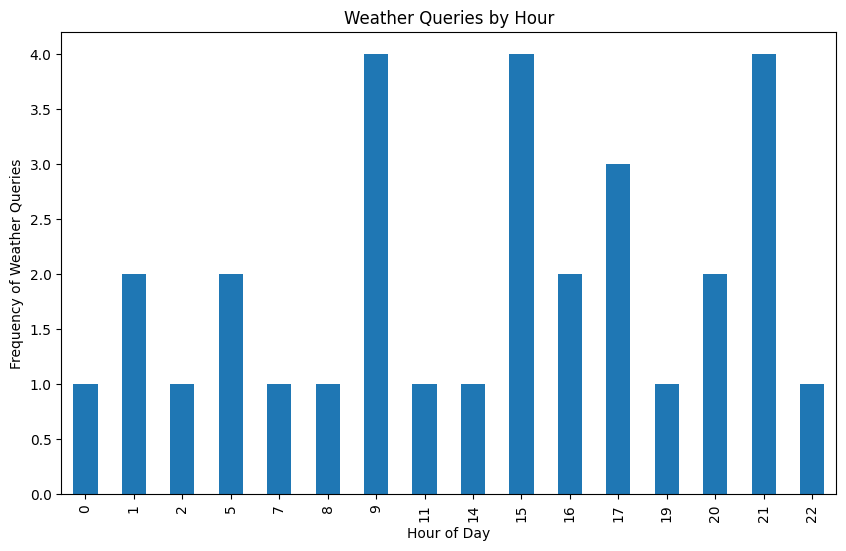

In [14]:
# Filter the 'Check weather' queries
weather_queries = user_voice_queries_df[user_voice_queries_df['action_link'] == 'Weather']

# Group by the hour to see when weather queries are made
weather_by_hour = weather_queries.groupby('hour').size()

# Display the frequency of 'Check weather' queries by hour
#print(weather_by_hour)

# Plot the results as a bar chart
weather_by_hour.plot(kind='bar', figsize=(10,6), title='Weather Queries by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency of Weather Queries')
plt.show()

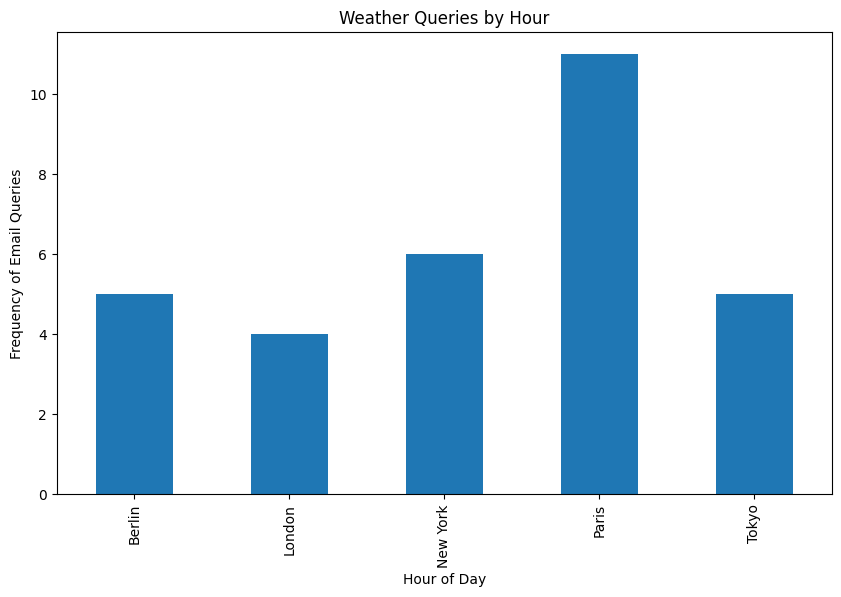

In [19]:
# Filter the 'Check weather' queries
email_queries = user_voice_queries_df[user_voice_queries_df['action_link'] == 'Email']

# Group by the hour to see when weather queries are made
email_by_location = email_queries.groupby('location').size()

# Display the frequency of 'Check weather' queries by hour
#print(weather_by_hour)

# Plot the results as a bar chart
email_by_location.plot(kind='bar', figsize=(10,6), title='Weather Queries by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency of Email Queries')
plt.show()

Grâce à ces analyses on peut extraire des caractéristiqes clés :
- Fréquence des types de requêtes : Par exemple, ici les utilisateurs envoient plus souvent des mails lorsqu'ls sont sur Paris .
- Temps moyen de réponse : Vous pouvez calculer le temps moyen entre la demande et la réponse pour chaque type d'interaction ou session. Cela vous permettra d'évaluer la réactivité de l'assistant.
- Heure et localisation : Ce sont des informations clés pour prédire le comportement utilisateur, par exemple, ici nos utilisateurs demandent la météo tous les jours à 9H, 15H et 21H.

# 3°) Modélisation prédictive et recommandation
### 3.1 Modèle de recommandation : le filtrage collaboratif. 
Filtrage collaboratif (par exemple, KNN ou SVD) : Utilisez des techniques de filtrage collaboratif pour recommander des chansons, des films ou des actions en fonction des préférences passées de l'utilisateur. Ce modèle se base sur les utilisateurs similaires ayant des préférences similaires.

In [21]:
!pip install surprise

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-macosx_14_0_x86_64.whl size=546923 sha256=db12894363999252b728f09444c7efe5ddb72133d644901ff09d5122551715f0
  Stored in directory: /Users/ericcosterousse/Library/Caches/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [26]:
# Merge the feedback table with the user_voice_queries_df on 'user_id' and 'query_text'
merged_df = pd.merge(user_voice_queries_df, feedback_df, on=['user_id'], how='inner')

In [28]:
merged_df.head(10)

,id_x,user_id,query_text,response_text,action_link,session_duration,interaction_time,location,tags,hour,day,id_y,query_id,rating,feedback_text,created_at
0,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,12216592,302,1,Terrible,2024-10-23 00:29:30.594180
1,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,89872648,526,5,Okay,2024-05-15 00:29:30.594748
2,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,66115497,765,5,Great,2024-06-22 00:29:30.594896
3,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,30507692,137,3,Great,2024-09-25 00:29:30.594978
4,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,49222033,636,5,Good,2024-09-20 00:29:30.594991
5,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,55244179,768,1,Bad,2024-02-24 00:29:30.595046
6,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,26767284,527,1,Okay,2024-03-03 00:29:30.595088
7,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,3436775,710,2,Bad,2025-01-16 00:29:30.595115
8,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,95980623,427,2,Okay,2024-01-24 00:29:30.595323
9,198,18165178,Give me a weather forecast for this weekend,Email sent successfully,Email,112,2025-01-20 20:07:30.211883,Paris,"a weather forecast, this weekend, give, me, we...",20,20,55232205,439,3,Great,2024-08-24 00:29:30.595530


In [31]:
from surprise import SVD, Reader, Dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_df[['user_id', 'query_text', 'rating']], reader)
trainset = data.build_full_trainset()
model = SVD()
model.fit(trainset)

In [35]:
!pip install prophet

  Using cached holidays-0.65-py3-none-any.whl.metadata (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 43.1 MB/s eta 0:00:0000:01
Using cached holidays-0.65-py3-none-any.whl (1.2 MB)


In [43]:
from prophet import Prophet
data = weather_queries.groupby('hour').size().reset_index(name='counts')
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)
model.plot(forecast)

TypeError: DataFrame.reset_index() got an unexpected keyword argument 'name'

In [41]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 34.9 MB/s eta 0:00:00 0:00:01


In [45]:
import statsmodels.api as sm

# Fit ARIMA model (order=(p,d,q))
model = sm.tsa.ARIMA(merged_df['rating'], order=(1, 1, 1))
model_fit = model.fit()

# Make forecast for the next 10 days
forecast = model_fit.forecast(steps=10)

print(forecast)

1013    3.022469
1014    3.117157
1015    3.125925
1016    3.126737
1017    3.126812
1018    3.126819
1019    3.126820
1020    3.126820
1021    3.126820
1022    3.126820
Name: predicted_mean, dtype: float64
